Задача о точке в квадрате  
Формулировка: Точка случайным образом бросается в квадрат со стороной a.  
Найти вероятность того, что расстояние от этой точки до ближайшей стороны квадрата будет меньше h (где 0 < h ≤ a/2).

Теоретическая вероятность:

Площадь квадрата: $S_{кв} = a^2$

Площадь центральной области (где расстояние до всех сторон ≥ h): квадрат со стороной $a - 2h$, $S_{центр} = (a - 2h)^2$

Площадь благоприятной области (где расстояние до хотя бы одной стороны < h): $S_{благ} = a^2 - (a - 2h)^2$

Теоретическая вероятность: $P = \frac{S_{благ}}{S_{кв}} = 1 - \left(\frac{a - 2h}{a}\right)^2$

Конкретный пример:
При $a = 4$ см, $h = 1$ см:
$P = 1 - \left(\frac{4 - 2·1}{4}\right)^2 = 1 - \left(\frac{2}{4}\right)^2 = 1 - 0.25 = 0.75$

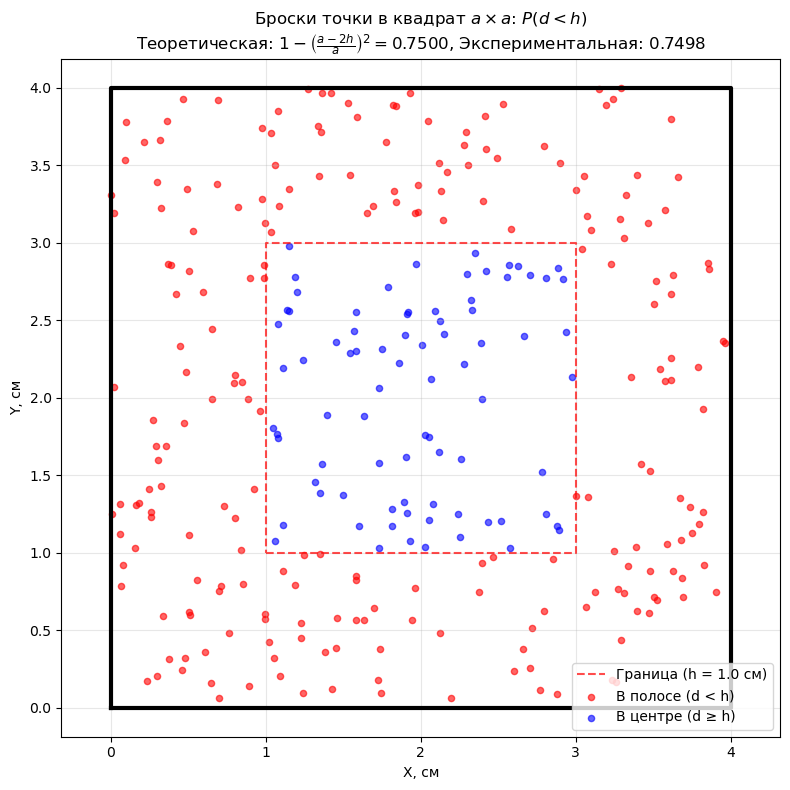

Сторона квадрата: a = 4.0 см
Ширина полосы: h = 1.0 см
Количество испытаний: N = 10000
Теоретическая вероятность: P = 1 - ((a-2h)/a)² = 0.750000
Экспериментальная вероятность: P* = 0.749800
Абсолютная ошибка: |P* - P| = 0.000200
Относительная ошибка: |P* - P|/P = 0.03%


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a = 4.0
h = 1.0
N = 10000  # Количество бросков

# Теоретическая вероятность
inner_square_side = a - 2 * h
P_theor = 1 - (inner_square_side ** 2) / (a ** 2)

# Моделирование
x = np.random.uniform(0, a, N)
y = np.random.uniform(0, a, N)

dist_to_sides = np.column_stack([x, a - x, y, a - y])
min_dist = np.min(dist_to_sides, axis=1)
is_in_strip = min_dist < h
P_exp = np.mean(is_in_strip)

# Визуализация
plt.figure(figsize=(8, 8))

plt.plot([0, a, a, 0, 0], 
         [0, 0, a, a, 0], 
         'k-', linewidth=3)

inner_x = [h, a - h, a - h, h, h]
inner_y = [h, h, a - h, a - h, h]
plt.plot(inner_x, inner_y, 'r--', alpha=0.7, label=f'Граница (h = {h} см)')

sample_size = min(300, N)
x_sample, y_sample = x[:sample_size], y[:sample_size]
in_strip_sample = is_in_strip[:sample_size]

plt.scatter(x_sample[in_strip_sample], y_sample[in_strip_sample], 
            c='red', s=20, alpha=0.6, label=f'В полосе (d < h)')
plt.scatter(x_sample[~in_strip_sample], y_sample[~in_strip_sample], 
            c='blue', s=20, alpha=0.6, label=f'В центре (d ≥ h)')

plt.title(r'Броски точки в квадрат $a \times a$: $P(d < h)$' + '\n' +
          r'Теоретическая: $1 - \left(\frac{a-2h}{a}\right)^2 = ' + f'{P_theor:.4f}$, ' +
          f'Экспериментальная: {P_exp:.4f}')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()


print(f"Сторона квадрата: a = {a} см")
print(f"Ширина полосы: h = {h} см")
print(f"Количество испытаний: N = {N}")
print(f"Теоретическая вероятность: P = 1 - ((a-2h)/a)² = {P_theor:.6f}")
print(f"Экспериментальная вероятность: P* = {P_exp:.6f}")
print(f"Абсолютная ошибка: |P* - P| = {abs(P_exp - P_theor):.6f}")
print(f"Относительная ошибка: |P* - P|/P = {abs(P_exp - P_theor)/P_theor*100:.2f}%")